In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
os.chdir('/kaggle/input')

In [2]:
import shutil
import os
from tqdm import tqdm

# Define source and destination directories
source_dir = "/kaggle/input/clip-hier-nocls"
destination_dir = "/kaggle/working/checkpoints_pytorch/clip_desc/level_1/"

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Check if source directory exists
if os.path.exists(source_dir):
    # Get the total number of items to track progress
    total_items = sum([len(files) for r, d, files in os.walk(source_dir)])
    
    # Initialize tqdm progress bar
    progress_bar = tqdm(total=total_items, desc='Moving files and folders')

    # Iterate over each item in the source directory
    for root, dirs, files in os.walk(source_dir):
        for item in files + dirs:
            source_item_path = os.path.join(root, item)
            destination_item_path = os.path.join(destination_dir, os.path.relpath(source_item_path, source_dir))

            # Copy the item to the destination directory
            shutil.copy(source_item_path, destination_item_path)
            
            # Update tqdm progress bar
            progress_bar.update(1)

    # Close tqdm progress bar
    progress_bar.close()

    print("Folders and their content copied successfully!")
else:
    print(f"Source directory '{source_dir}' does not exist.")


Moving files and folders: 100%|██████████| 3/3 [00:05<00:00,  1.91s/it]

Folders and their content copied successfully!


In [3]:
import shutil
import os
from tqdm import tqdm

# Define source and destination directories
source_dir_1 = "/kaggle/input/clip-level-2-fiction"
destination_dir_1 = "/kaggle/working/checkpoints_pytorch/clip_desc/level_2_fiction/"

source_dir_2 = "/kaggle/input/clip-level-2-non-fiction-nocls"
destination_dir_2 = "/kaggle/working/checkpoints_pytorch/clip_desc/level_2_non_fiction/"

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir_1):
    os.makedirs(destination_dir_1)

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir_2):
    os.makedirs(destination_dir_2)

# Check if source directory exists
if os.path.exists(source_dir_1):
    # Get the total number of items to track progress
    total_items = sum([len(files) for r, d, files in os.walk(source_dir_1)])
    
    # Initialize tqdm progress bar
    progress_bar = tqdm(total=total_items, desc='Moving files and folders')

    # Iterate over each item in the source directory
    for root, dirs, files in os.walk(source_dir_1):
        for item in files + dirs:
            source_item_path = os.path.join(root, item)
            destination_item_path = os.path.join(destination_dir_1, os.path.relpath(source_item_path, source_dir_1))

            # Copy the item to the destination directory
            shutil.copy(source_item_path, destination_item_path)
            
            # Update tqdm progress bar
            progress_bar.update(1)

    # Close tqdm progress bar
    progress_bar.close()

    print("Folders and their content copied successfully!")
else:
    print(f"Source directory '{source_dir_1}' does not exist.")

    
# Check if source directory exists
if os.path.exists(source_dir_2):
    # Get the total number of items to track progress
    total_items = sum([len(files) for r, d, files in os.walk(source_dir_2)])
    
    # Initialize tqdm progress bar
    progress_bar = tqdm(total=total_items, desc='Moving files and folders')

    # Iterate over each item in the source directory
    for root, dirs, files in os.walk(source_dir_2):
        for item in files + dirs:
            source_item_path = os.path.join(root, item)
            destination_item_path = os.path.join(destination_dir_2, os.path.relpath(source_item_path, source_dir_2))

            # Copy the item to the destination directory
            shutil.copy(source_item_path, destination_item_path)
            
            # Update tqdm progress bar
            progress_bar.update(1)

    # Close tqdm progress bar
    progress_bar.close()

    print("Folders and their content copied successfully!")
else:
    print(f"Source directory '{source_dir_2}' does not exist.")


Moving files and folders: 100%|██████████| 3/3 [00:06<00:00,  2.05s/it]


Folders and their content copied successfully!


Moving files and folders: 100%|██████████| 3/3 [00:06<00:00,  2.06s/it]

Folders and their content copied successfully!


In [3]:
import torch
import torchinfo
from torchvision.models import resnet50
from torch.utils.data import DataLoader

import pandas as pd

from dataloader.level_1_dataloader import book_dataset
from model31.level_1_classifier import level_1_classifier, level_1_model, level_1_output_layer, level_1_fusion_layer
from model31.level_2_classifier import level_2_classifier, level_2_output_layer,  level_2_post_model, level_2_final_model
from config36.Trainer import Trainer_level_1, Trainer_level_2
from config36.Tester import Tester_level_1, Tester_level_2
# from transformers import BertTokenizer, BertModel, BertConfig
# from transformers import DistilBertTokenizer, DistilBertModel
# from transformers import XLNetTokenizer, XLNetModel
# from transformers import RobertaTokenizer, RobertaModel
# from transformers import GPT2Tokenizer, GPT2Model
from transformers import CLIPTextModel, CLIPTokenizer
# from transformers import AutoTokenizer, BlipTextModel
import copy
import torchvision.transforms as transforms

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
os.chdir('/kaggle/working')

In [5]:
def assign_gpu_model(model):
    print("cuda" if torch.cuda.is_available() else "cpu")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model

In [6]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.7 MB/s eta 0:00:0000:01


In [6]:

# resize = transforms.Resize((4,4))
# normalize = transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
# version = 'distilbert-base-uncased'
# max_length = 120
# desc_processor = DistilBertTokenizer.from_pretrained(version)

# version = 'xlnet-base-cased'
# max_length = 120
# desc_processor = XLNetTokenizer.from_pretrained(version)


# version = 'FacebookAI/roberta-base'
# max_length = 120
# desc_processor = RobertaTokenizer.from_pretrained(version)

# from diffusers import StableDiffusionPipeline
max_length = 77
# from diffusers import DiffusionPipeline
desc_processor = CLIPTokenizer.from_pretrained('openai/clip-vit-base-patch32')
# desc_processor = AutoTokenizer.from_pretrained('Salesforce/blip-image-captioning-large')
# desc_processor = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5',safety_checker = None,
#     requires_safety_checker = False)
# desc_processor = DiffusionPipeline.from_pretrained('openai/clip-vit-base-patch32')


train_set = book_dataset(csv_file ='/kaggle/input/csv-files-data/train_set.csv', data_dir ='/kaggle/input/classification-dataset-iiti/description/description', desc_processor= desc_processor, model_name='clip', max_length = max_length)
val_set = book_dataset(csv_file ='/kaggle/input/csv-files-data/val_set.csv', data_dir ='/kaggle/input/classification-dataset-iiti/description/description', desc_processor= desc_processor, model_name='clip', max_length = max_length)
test_set = book_dataset(csv_file ='/kaggle/input/csv-files-data/test_set.csv', data_dir ='/kaggle/input/classification-dataset-iiti/description/description', desc_processor= desc_processor, model_name='clip', max_length = max_length)

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

In [ ]:
desc_processor

In [7]:
def fine_tune_load_model():
#     model = RobertaModel.from_pretrained(version, return_dict=False)
#     model = DistilBertModel.from_pretrained(version, return_dict=False)
#     model = XLNetModel.from_pretrained(version, return_dict=False)
#     model = GPT2Model.from_pretrained('gpt2', return_dict=False)
    model = CLIPTextModel.from_pretrained('openai/clip-vit-base-patch32', return_dict=False)
#     model = BlipTextModel.from_pretrained('Salesforce/blip-image-captioning-large', return_dict=False)

    
    print(model.modules)
    # print(model.pooler.activation)
    
    # modules=list(model.children())[:-1]
    # new_model= torch.nn.Sequential(*modules)
    for p in model.parameters():
        p.requires_grad = True
    # new_model.pooler.activation = torch.nn.Flatten()

    return model
    

In [8]:
desc_bert = fine_tune_load_model()

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<bound method Module.modules of CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_

In [9]:
used_model = 'clip_desc'
# used_model1_feature_size = 768
used_model1_feature_size = 512 # for clip
level_1_checkpoint_dir = '/kaggle/working/checkpoints_pytorch/'+used_model+'/level_1/'
level_1_model_file = 'model.pth'
level_1_csvlogger_file = 'log.csv'
level_1_weights_path = os.path.join(level_1_checkpoint_dir, level_1_model_file)
feature_size_extract_from_level_1 = 64
no_epoch = 20
lr = 0.00001
optimizer = 'AdamW'

if not os.path.exists(level_1_checkpoint_dir):
    os.makedirs(level_1_checkpoint_dir)

In [15]:

# fusion_layer = level_1_fusion_layer(used_model1_feature_size,used_model2_feature_size, projection_size = projection_size_each_model)
classifier_level_1 = level_1_classifier(feature_size=used_model1_feature_size,feature_size_extract_from_level_1=feature_size_extract_from_level_1, model='clip')
output_layer_level_1 = level_1_output_layer(feature_size_extract_from_level_1 = feature_size_extract_from_level_1, no_class = 2)
model_level_1 = level_1_model(desc_bert, classifier_level_1, output_layer_level_1, model_name = 'clip')
model_level_1 = assign_gpu_model(model_level_1)
print(model_level_1.modules)

cuda
<bound method Module.modules of level_1_model(
  (model1): CLIPTextModel(
    (text_model): CLIPTextTransformer(
      (embeddings): CLIPTextEmbeddings(
        (token_embedding): Embedding(49408, 512)
        (position_embedding): Embedding(77, 512)
      )
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=512, out_features=512, bias=True)
              (v_proj): Linear(in_features=512, out_features=512, bias=True)
              (q_proj): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
            )
            (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): QuickGELUActivation()
              (fc1): Linear(in_features=512, out_features=2048, bias=True)
              (fc2): Linear(in_fea

In [16]:

train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
print(len(train_dataloader))

val_dataloader = DataLoader(val_set, batch_size=32, shuffle=True)
print(len(val_dataloader))

test_dataloader = DataLoader(test_set, batch_size=32, shuffle=True)
print(len(test_dataloader))

602
77
77


In [17]:
trainer = Trainer_level_1(model = model_level_1, level=1, training_dataloader = train_dataloader, validation_dataloader = val_dataloader, epoch = no_epoch, learning_rate = lr, use_gpu = True, opt_method = optimizer, checkpoint_dir = level_1_checkpoint_dir, checkpoint_filename=level_1_model_file, csv_logger = level_1_csvlogger_file, model_name='clip'  )

GPU is available
GPU Name: Tesla P100-PCIE-16GB


Finish initializing...
2024-07-03 16:32:15.983209
EPOCH 1:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.09]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4169419144475184, train_precision_0.992448018830914, train_recall_0.9941055113468906, train_f1 0.9932760736196319, train_acc_0.9928827471556964, train_ba_0.9928079927186493, train_spec_0.9915104740904079, train_hm_0.0071172528443036, val_loss 1.5292011499404907, val_precision_0.9468822170900693, val_recall_0.9138187221396731, val_f1 0.9300567107750471, val_acc_0.9240246406570842, val_ba_0.9252289202984867, val_spec_0.9366391184573003, val_hm_0.07597535934291581
2024-07-03 16:36:09.059826
EPOCH 2:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.12]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4136058113899739, train_precision_0.9951790633608816, train_recall_0.9937125454366834, train_f1 0.9944452637270805, train_acc_0.9941295651722167, train_ba_0.994155059928926, train_spec_0.9945975744211687, train_hm_0.005870434827783261, val_loss 1.5366283655166626, val_precision_0.9399109792284867, val_recall_0.9413075780089153, val_f1 0.9406087602078693, val_acc_0.9342915811088296, val_ba_0.9334637063598296, val_spec_0.9256198347107438, val_hm_0.06570841889117043
2024-07-03 16:40:00.494360
EPOCH 3:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4121581325895367, train_precision_0.9945060335524379, train_recall_0.9958738579428235, train_f1 0.9951894757510308, train_acc_0.994908826432542, train_ba_0.994849828640651, train_spec_0.9938257993384785, train_hm_0.005091173567458049, val_loss 1.5224201679229736, val_precision_0.9146685472496474, val_recall_0.9635958395245171, val_f1 0.9384949348769899, val_acc_0.9301848049281314, val_ba_0.926242364206703, val_spec_0.8888888888888888, val_hm_0.06981519507186858
2024-07-03 16:43:53.194523
EPOCH 4:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4105610669253277, train_precision_0.9950922654102866, train_recall_0.9959720994203752, train_f1 0.995531988019836, train_acc_0.9952724816873604, train_ba_0.9952297101291512, train_spec_0.9944873208379272, train_hm_0.004727518312639617, val_loss 1.5504223108291626, val_precision_0.9648562300319489, val_recall_0.8974739970282318, val_f1 0.9299461123941494, val_acc_0.9252566735112936, val_ba_0.9285349783120957, val_spec_0.9595959595959596, val_hm_0.07474332648870637
2024-07-03 16:47:44.716129
EPOCH 5:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4082048380889767, train_precision_0.995877907547355, train_recall_0.9968562727183417, train_f1 0.9963668499607227, train_acc_0.9961556444490622, train_ba_0.9961128111111003, train_spec_0.9953693495038589, train_hm_0.003844355550937711, val_loss 1.491516351699829, val_precision_0.9346549192364171, val_recall_0.9457652303120356, val_f1 0.9401772525849336, val_acc_0.9334702258726899, val_ba_0.9320194379292042, val_spec_0.9182736455463728, val_hm_0.06652977412731007
2024-07-03 16:51:37.388234
EPOCH 6:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4065190632873992, train_precision_0.9965598584627482, train_recall_0.9960703408979271, train_f1 0.9963150395519089, train_acc_0.9961036936983739, train_ba_0.996105732742238, train_spec_0.996141124586549, train_hm_0.0038963063016260583, val_loss 1.5475411415100098, val_precision_0.9563522992985191, val_recall_0.9115898959881129, val_f1 0.9334347660707494, val_acc_0.9281314168377823, val_ba_0.930083285918758, val_spec_0.9485766758494031, val_hm_0.07186858316221766
2024-07-03 16:55:29.020371
EPOCH 7:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.12]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4056134978402097, train_precision_0.9965615482856862, train_recall_0.9965615482856862, train_f1 0.9965615482856862, train_acc_0.9963634474518157, train_ba_0.9963513364361176, train_spec_0.996141124586549, train_hm_0.003636552548184321, val_loss 1.5705233812332153, val_precision_0.9681372549019608, val_recall_0.8803863298662704, val_f1 0.9221789883268482, val_acc_0.917864476386037, val_ba_0.9222868288449809, val_spec_0.9641873278236914, val_hm_0.08213552361396304
2024-07-03 16:59:20.674763
EPOCH 8:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.07]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4044977729502706, train_precision_0.9969545141958935, train_recall_0.9969545141958935, train_f1 0.9969545141958935, train_acc_0.9967790534573224, train_ba_0.9967683265577042, train_spec_0.9965821389195149, train_hm_0.0032209465426775415, val_loss 1.5354253053665161, val_precision_0.9501533742331288, val_recall_0.9205052005943536, val_f1 0.9350943396226414, val_acc_0.9293634496919918, val_ba_0.9304087068169197, val_spec_0.9403122130394858, val_hm_0.07063655030800821
2024-07-03 17:03:12.266466
EPOCH 9:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.09]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4037992385930793, train_precision_0.9971521162722184, train_recall_0.9975439630612044, train_f1 0.9973480011786663, train_acc_0.9971946594628293, train_ba_0.9971733045736011, train_spec_0.9968026460859978, train_hm_0.002805340537170762, val_loss 1.4940916299819946, val_precision_0.9511823035850496, val_recall_0.9264487369985142, val_f1 0.9386526157320287, val_acc_0.9330595482546201, val_ba_0.9338396118417731, val_spec_0.9412304866850322, val_hm_0.06694045174537988
2024-07-03 17:07:03.739738
EPOCH 10:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.07]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4062651722534154, train_precision_0.9961640601947477, train_recall_0.994989684644857, train_f1 0.9955765260984959, train_acc_0.9953244324380487, train_ba_0.9953448974492202, train_spec_0.9957001102535833, train_hm_0.0046755675619512705, val_loss 1.5732582807540894, val_precision_0.9654062751407884, val_recall_0.8915304606240714, val_f1 0.9269988412514484, val_acc_0.922381930184805, val_ba_0.9260223469327886, val_spec_0.960514233241506, val_hm_0.07761806981519508
2024-07-03 17:10:55.341702
EPOCH 11:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.09]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4013955426770588, train_precision_0.9987227353114561, train_recall_0.9986246193142745, train_f1 0.9986736749029818, train_acc_0.9985973297314146, train_ba_0.9985956613660678, train_spec_0.9985667034178611, train_hm_0.001402670268585381, val_loss 1.5670151710510254, val_precision_0.9376391982182628, val_recall_0.9383358098068351, val_f1 0.9379873746750836, val_acc_0.9314168377823409, val_ba_0.9306004117904698, val_spec_0.9228650137741047, val_hm_0.06858316221765914
2024-07-03 17:14:47.033220
EPOCH 12:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.15]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.402525476641037, train_precision_0.9970565149136578, train_recall_0.998329894881619, train_f1 0.9976927985862256, train_acc_0.9975583147176477, train_ba_0.9975111436921877, train_spec_0.9966923925027563, train_hm_0.00244168528235233, val_loss 1.572609782218933, val_precision_0.8950238582140423, val_recall_0.975482912332838, val_f1 0.933522929257021, val_acc_0.9232032854209445, val_ba_0.9170343854593483, val_spec_0.8585858585858586, val_hm_0.07679671457905544
2024-07-03 17:18:38.667735
EPOCH 13:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.15]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4006028626844336, train_precision_0.9986248895000491, train_recall_0.9988211022693781, train_f1 0.9987229862475442, train_acc_0.998649280482103, train_ba_0.9986387760519989, train_spec_0.9984564498346197, train_hm_0.0013507195178970336, val_loss 1.5741785764694214, val_precision_0.9606299212598425, val_recall_0.9063893016344725, val_f1 0.9327217125382263, val_acc_0.9277207392197125, val_ba_0.9302378096785769, val_spec_0.9540863177226814, val_hm_0.07227926078028747
2024-07-03 17:22:30.239246
EPOCH 14:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.400538287883581, train_precision_0.9989193437469299, train_recall_0.9989193437469299, train_f1 0.9989193437469299, train_acc_0.9988570834848564, train_ba_0.9988532771656369, train_spec_0.9987872105843439, train_hm_0.0011429165151436438, val_loss 1.5618358850479126, val_precision_0.9486016628873771, val_recall_0.9323922734026746, val_f1 0.9404271262645184, val_acc_0.9347022587268994, val_ba_0.9349748327527606, val_spec_0.9375573921028466, val_hm_0.06529774127310062
2024-07-03 17:26:21.916316
EPOCH 15:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.07]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4005906306627978, train_precision_0.9989193437469299, train_recall_0.9989193437469299, train_f1 0.9989193437469299, train_acc_0.9988570834848564, train_ba_0.9988532771656369, train_spec_0.9987872105843439, train_hm_0.0011429165151436438, val_loss 1.5564814805984497, val_precision_0.9479245283018868, val_recall_0.9331352154531947, val_f1 0.940471733433171, val_acc_0.9347022587268994, val_ba_0.9348871669552474, val_spec_0.9366391184573003, val_hm_0.06529774127310062
2024-07-03 17:30:13.394544
EPOCH 16:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4008481987687045, train_precision_0.9989193437469299, train_recall_0.9989193437469299, train_f1 0.9989193437469299, train_acc_0.9988570834848564, train_ba_0.9988532771656369, train_spec_0.9987872105843439, train_hm_0.0011429165151436438, val_loss 1.5656583309173584, val_precision_0.946656649135988, val_recall_0.9361069836552749, val_f1 0.941352259992529, val_acc_0.9355236139630391, val_ba_0.9354547774107412, val_spec_0.9348025711662076, val_hm_0.06447638603696099
2024-07-03 17:34:04.827557
EPOCH 17:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.74batch/s, loss=1.11]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.40826666731375, train_precision_0.9949798208485087, train_recall_0.9930248550938207, train_f1 0.9940013767332088, train_acc_0.9936620084160216, train_ba_0.9937009611742532, train_spec_0.9943770672546858, train_hm_0.0063379915839783885, val_loss 1.5450471639633179, val_precision_0.955108359133127, val_recall_0.9167904903417533, val_f1 0.935557240333586, val_acc_0.9301848049281314, val_ba_0.9317653094500318, val_spec_0.9467401285583104, val_hm_0.06981519507186858
2024-07-03 17:37:55.983696
EPOCH 18:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.11]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4001212046787985, train_precision_0.9981330451016999, train_recall_0.9979369289714117, train_f1 0.9980349774022401, train_acc_0.9979219699724661, train_ba_0.997921055444912, train_spec_0.9979051819184124, train_hm_0.0020780300275338977, val_loss 1.5460180044174194, val_precision_0.9439461883408071, val_recall_0.9383358098068351, val_f1 0.9411326378539494, val_acc_0.9351129363449692, val_ba_0.9347326431954286, val_spec_0.931129476584022, val_hm_0.0648870636550308
2024-07-03 17:41:47.354570
EPOCH 19:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.73batch/s, loss=1.12]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.399891503427512, train_precision_0.998625024553133, train_recall_0.9989193437469299, train_f1 0.9987721624674623, train_acc_0.9987012312327913, train_ba_0.9986878967907749, train_spec_0.9984564498346197, train_hm_0.0012987687672086862, val_loss 1.5925617218017578, val_precision_0.9508692365835223, val_recall_0.9346210995542348, val_f1 0.9426751592356688, val_acc_0.9371663244353182, val_ba_0.9374666562968603, val_spec_0.9403122130394858, val_hm_0.06283367556468172
2024-07-03 17:45:38.754167
EPOCH 20:


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 602/602 [03:40<00:00,  2.74batch/s, loss=1.08]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 1.4004899324768803, train_precision_0.9986247544204322, train_recall_0.9987228607918263, train_f1 0.9986738051967189, train_acc_0.9985973297314146, train_ba_0.998589655313223, train_spec_0.9984564498346197, train_hm_0.001402670268585381, val_loss 1.563734531402588, val_precision_0.9605568445475638, val_recall_0.9227340267459139, val_f1 0.9412656309208034, val_acc_0.9363449691991786, val_ba_0.9379510354115244, val_spec_0.953168044077135, val_hm_0.06365503080082136


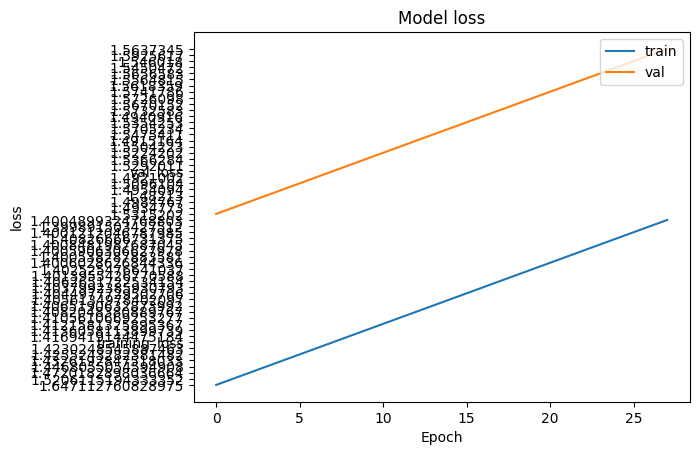

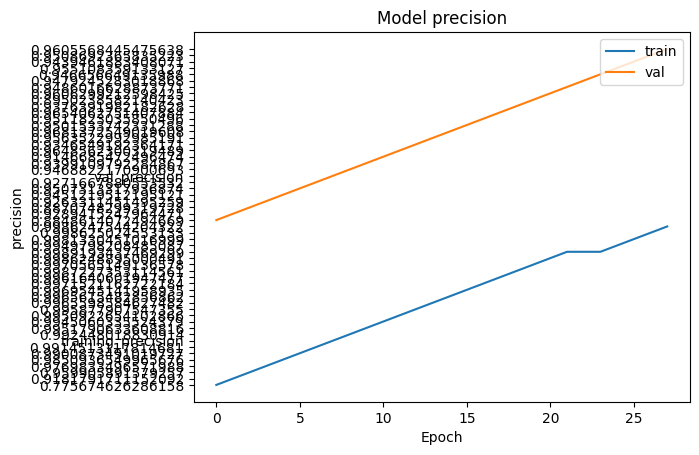

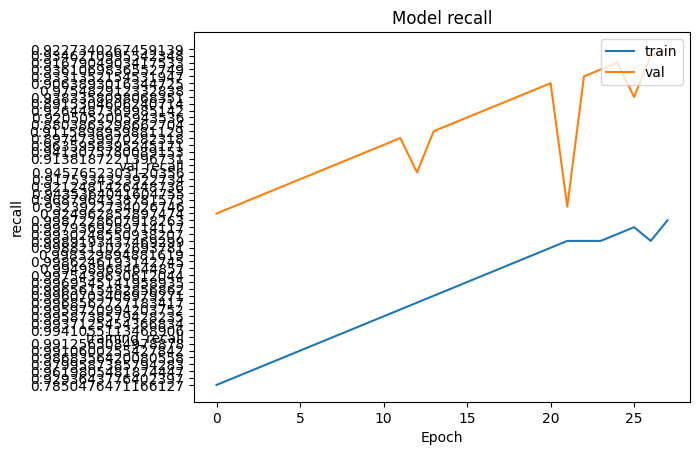

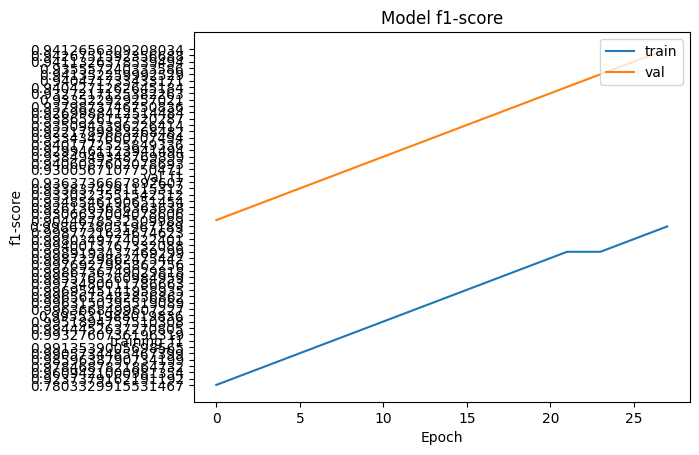

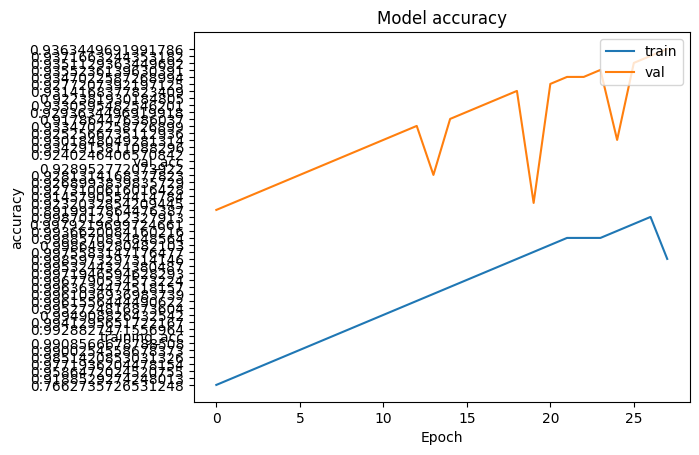

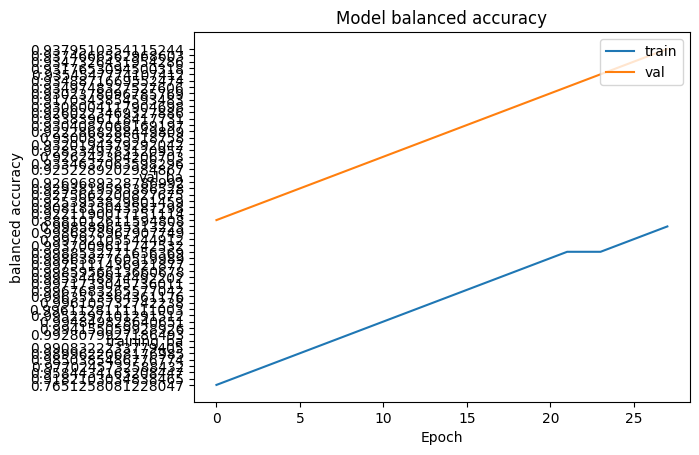

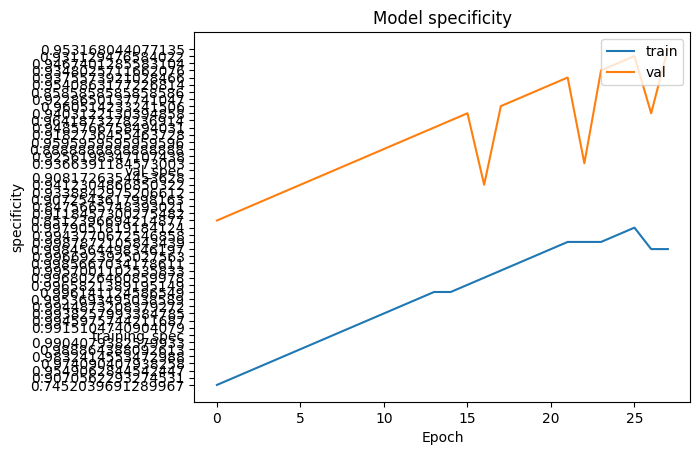

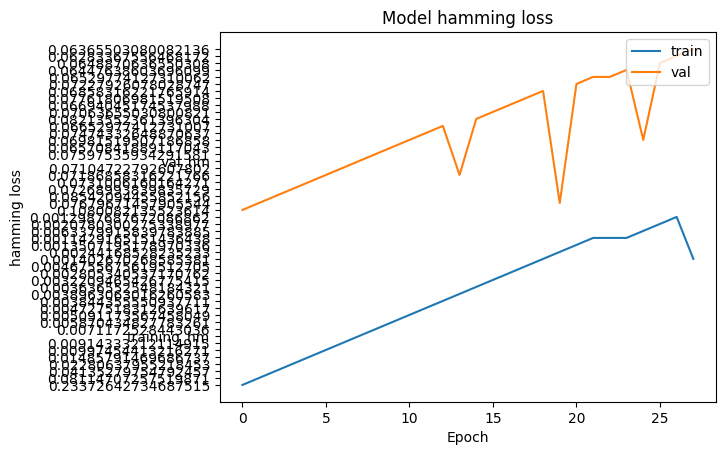

In [15]:
trainer.run()

In [14]:
# from config.Tester import Tester
tester = Tester_level_1(model = model_level_1, weights_file = level_1_model_file, level = 1,  data_loader = test_dataloader, checkpoint_dir = level_1_checkpoint_dir, model_name='clip')

weights are loaded


In [15]:
tester.prediction()

started prediction
2024-07-04 08:51:28.630732


  0%|          | 0/77 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 77/77 [02:24<00:00,  1.87s/batch, loss=0.349]

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
LOSS test 1.463213562965393, test_precision 0.9545787545787546, test_recall 0.9630450849963045, test_f1 0.9587932303164091, test_accuracy 0.9540229885057471, test_BA 0.9528983504390571, test_specificity 0.9427516158818098, test_hamming_loss 0.04597701149425287


In [13]:
no_epoch = 60
lr = 0.00001
optimizer = 'AdamW'
level_2_checkpoint_dir = '/kaggle/working/checkpoints_pytorch/'+used_model+'/level_2_'
fiction_gamma_pos = 3
fiction_gamma_neg = 5
non_fiction_gamma_pos = 3
non_fiction_gamma_neg = 5

if not os.path.exists(level_2_checkpoint_dir):
    os.makedirs(level_2_checkpoint_dir)

In [14]:
# level 2 fiction and non-fiction making
level_2_fic_checkpoint_dir = '/kaggle/working/checkpoints_pytorch/'+used_model+'/level_2_fiction'
level_2_nonfic_checkpoint_dir = '/kaggle/working/checkpoints_pytorch/'+used_model+'/level_2_non_fiction'
if not os.path.exists(level_2_fic_checkpoint_dir):
    os.makedirs(level_2_fic_checkpoint_dir)
if not os.path.exists(level_2_nonfic_checkpoint_dir):
    os.makedirs(level_2_nonfic_checkpoint_dir)

In [19]:
# fusion_layer = level_1_fusion_layer(used_model1_feature_size,used_model2_feature_size, projection_size = projection_size_each_model)
classifier_level_1 = level_1_classifier(feature_size=used_model1_feature_size,feature_size_extract_from_level_1=feature_size_extract_from_level_1, model='clip')
# level_1_model = assign_gpu_model(level_1_model)
output_layer_level_1 = level_1_output_layer(feature_size_extract_from_level_1 = feature_size_extract_from_level_1, no_class = 2)
model_level_1 = level_1_model(desc_bert, classifier_level_1, output_layer_level_1, model_name = 'clip')
model_level_1.load_state_dict(torch.load(level_1_weights_path))
# print(model_level_1)

# model_level_1 = freeze_full_model(copy.deepcopy(model_level_1))
# print(model_level_1)

<All keys matched successfully>

In [20]:
# fusion_layer = level_1_fusion_layer(used_model1_feature_size,used_model2_feature_size, projection_size = projection_size_each_model)
fiction_classifier = level_2_classifier(model_feature_size = used_model1_feature_size, feature_from_level_1=feature_size_extract_from_level_1)
fiction_op_layer = level_2_output_layer(feature_size_extract_from_level_2=64, no_class = 29)
fiction_model = level_2_final_model(desc_bert, fiction_classifier, fiction_op_layer, model_name = 'clip')
fiction_model = assign_gpu_model(fiction_model)
# fiction_model = level_2_post_model(level_2_classifier = fiction_classifier, level_2_output_layer = fiction_op_layer)

cuda


In [21]:
# fusion_layer = level_1_fusion_layer(used_model1_feature_size,used_model2_feature_size, projection_size = projection_size_each_model)
non_fiction_classifier = level_2_classifier(model_feature_size = used_model1_feature_size, feature_from_level_1=feature_size_extract_from_level_1)
non_fiction_op_layer = level_2_output_layer(feature_size_extract_from_level_2=64, no_class = 29)
non_fiction_model = level_2_final_model(desc_bert, non_fiction_classifier, non_fiction_op_layer, model_name = 'clip')
non_fiction_model = assign_gpu_model(non_fiction_model)

cuda


In [22]:
level_2_trainer = Trainer_level_2(level_1_model = model_level_1,fiction_model =  fiction_model, non_fiction_model = non_fiction_model, training_dataloader = train_dataloader, validation_dataloader = val_dataloader, epoch = no_epoch, learning_rate = lr, use_gpu = True, opt_method = optimizer, fiction_checkpoint_dir = level_2_checkpoint_dir+'fiction', non_fiction_checkpoint_dir = level_2_checkpoint_dir+'non_fiction', checkpoint_filename = level_1_model_file, fiction_gamma_pos = fiction_gamma_pos, fiction_gamma_neg = fiction_gamma_neg, non_fiction_gamma_pos = non_fiction_gamma_pos, non_fiction_gamma_neg = non_fiction_gamma_neg, csv_logger = level_1_csvlogger_file)

In [ ]:
level_2_trainer.run()

Finish initializing...
Create data for level 2


  0%|          | 0/602 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 77/77 [00:08<00:00,  8.66batch/s]


2024-07-06 13:18:40.945619
EPOCH 1:


 62%|██████▏   | 396/637 [00:56<00:33,  7.10batch/s, loss=0.00829]

In [ ]:
import os
os.getcwd()

In [20]:
tester_level_2 = Tester_level_2(level_1_model = model_level_1,fiction_model =  fiction_model, non_fiction_model = non_fiction_model, weights_file = level_1_model_file, data_loader = test_dataloader, fiction_checkpoint_dir = level_2_checkpoint_dir+'fiction', non_fiction_checkpoint_dir = level_2_checkpoint_dir+'non_fiction', fiction_gamma_pos = fiction_gamma_pos, fiction_gamma_neg = fiction_gamma_neg, non_fiction_gamma_pos = non_fiction_gamma_pos, non_fiction_gamma_neg = non_fiction_gamma_neg)

fiction weights are loaded
non fiction weights are loaded


In [ ]:
os.chdir('/kaggle/input')

In [ ]:
from config35.Trainer import Trainer_level_1, Trainer_level_2
from config35.Tester import Tester_level_1, Tester_level_2

In [ ]:
os.chdir('/kaggle/working')

In [21]:
tester_level_2.prediction()

started prediction
2024-07-04 13:47:18.367326


  0%|          | 0/77 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 77/77 [02:28<00:00,  1.93s/batch]


[[[0.03125    0.03125   ]
  [0.03151743 0.03109788]
  [0.03128331 0.03123695]
  ...
  [0.0312182  0.03130729]
  [0.03130416 0.03125187]
  [0.03121458 0.03127767]]

 [[0.03125    0.03125   ]
  [0.0313857  0.03116193]
  [0.03139687 0.03118095]
  ...
  [0.0309704  0.03144331]
  [0.03097003 0.03144135]
  [0.03110786 0.03135831]]

 [[0.03125    0.03125   ]
  [0.0314192  0.0311718 ]
  [0.03130434 0.03119712]
  ...
  [0.03104544 0.0314083 ]
  [0.03112052 0.0313409 ]
  [0.03102094 0.03140487]]

 ...

 [[0.25       0.25      ]
  [0.24871746 0.25063315]
  [0.25063682 0.24943109]
  ...
  [0.2486043  0.25084397]
  [0.24894872 0.2506525 ]
  [0.2489176  0.2507202 ]]

 [[0.25       0.25      ]
  [0.25049895 0.24978854]
  [0.24996683 0.25015867]
  ...
  [0.25008285 0.250215  ]
  [0.24957232 0.250289  ]
  [0.24958062 0.25022683]]

 [[0.25       0.25      ]
  [0.25052726 0.24977396]
  [0.24871783 0.2510199 ]
  ...
  [0.25031713 0.24972424]
  [0.25016326 0.24965857]
  [0.2505382  0.24963945]]]
new test l

  8%|▊         | 1/12 [00:01<00:20,  1.86s/batch, loss=0.00838]

voutput from tester is shape: torch.Size([16, 77, 29])


 17%|█▋        | 2/12 [00:04<00:22,  2.29s/batch, loss=0.00789]

voutput from tester is shape: torch.Size([16, 77, 29])


 25%|██▌       | 3/12 [00:06<00:18,  2.07s/batch, loss=0.00857]

voutput from tester is shape: torch.Size([16, 77, 29])


 33%|███▎      | 4/12 [00:08<00:15,  1.96s/batch, loss=0.00862]

voutput from tester is shape: torch.Size([16, 77, 29])


 42%|████▏     | 5/12 [00:09<00:13,  1.90s/batch, loss=0.0082] 

voutput from tester is shape: torch.Size([16, 77, 29])


 50%|█████     | 6/12 [00:11<00:11,  1.87s/batch, loss=0.00823]

voutput from tester is shape: torch.Size([16, 77, 29])


 58%|█████▊    | 7/12 [00:13<00:09,  1.85s/batch, loss=0.00791]

voutput from tester is shape: torch.Size([16, 77, 29])


 67%|██████▋   | 8/12 [00:15<00:07,  1.83s/batch, loss=0.00807]

voutput from tester is shape: torch.Size([16, 77, 29])


 75%|███████▌  | 9/12 [00:17<00:05,  1.82s/batch, loss=0.00878]

voutput from tester is shape: torch.Size([16, 77, 29])


 83%|████████▎ | 10/12 [00:18<00:03,  1.81s/batch, loss=0.00816]

voutput from tester is shape: torch.Size([16, 77, 29])


 92%|█████████▏| 11/12 [00:20<00:01,  1.81s/batch, loss=0.0086] 

voutput from tester is shape: torch.Size([16, 77, 29])


100%|██████████| 12/12 [00:21<00:00,  1.83s/batch, loss=0.00904]
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


voutput from tester is shape: torch.Size([11, 77, 29])
LOSS test 0.008371856063604355, test_precision 0.009588788493453758, test_recall 0.10344827586206085, test_f1 0.017245212177546376, test_accuracy 0.8012170385395494, test_BA 0.49999999999999306, test_specificity 0.8965517241379253, test_hamming_loss 0.19878296146044622
acc [0.95187166 0.90374332 0.92513369 0.92513369 0.93048128 0.93582888
 0.93582888 0.94117647 0.94652406 0.80213904 0.87165775 0.8342246
 0.81818182 0.58823529 0.94652406 0.09625668 0.03743316 0.87165775
 0.95187166 0.87700535 0.96791444 0.68449198 0.93048128 0.85026738
 0.74331551 0.94652406 0.93048128 0.94652406 0.14438503]
precision [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09625668 0.03743316 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14438503]
recall [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

  0%|          | 0/141 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 141/141 [04:19<00:00,  1.84s/batch, loss=0.00749]
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LOSS test 0.007656767964363098, test_precision 0.015547139724935212, test_recall 0.06896551724137917, test_f1 0.02521667257832537, test_accuracy 0.8487757010778731, test_BA 0.4999999999999999, test_specificity 0.9310344827586206, test_hamming_loss 0.1512242989221247
acc [0.92796799 0.84259671 0.95464651 0.85371276 0.94486438 0.95420187
 0.95020009 0.95909293 0.93374833 0.9439751  0.90128946 0.94086261
 0.27123166 0.17963539 0.87816807 0.67363273 0.78701645 0.93063584
 0.9270787  0.88972877 0.9524233  0.88483771 0.86438417 0.90840373
 0.91551801 0.9524233  0.87772343 0.93686083 0.6776345 ]
precision [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.27123166 0.17963539 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
recall [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
f1 [